<a href="https://colab.research.google.com/github/raflidzaky/about-me/blob/main/Dibimbing_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Identity
This is project done by Muhammad Dzaky Rafliansyah. This project is supposed for Dibimbing.id Data Challenge submission. If you have further question about this project, you can ask him through Linkedin or E-mail.

E-mail: dzakyrafliansyah@gmail.com

Linkedin: https://www.linkedin.com/in/dzakyrafliansyah/

# Project Overview
This project's objective is answering 3 business questions regarding hotel demand (detailed questions will be attached in Exploratory Data Analysis section). There are 3 analysis process used in: Descriptive, diagnostic, and predictive. Hence, this project is supposed to give a detailed analysis and data-driven decision regarding hotel demand.

Colaboratory content:
*   **Environment Setting**: Libraries imported
*   **Data Preparation**   : Data collection
*   **Data Understanding and Cleaning**: Understand data shape and cleansing
*   **Deep Analysis**: Descriptive analysis
*   **Feature Engineering and Machine Learning Method**: Feature selection and building model (includes hyperparameter tuning).
*   **K-Fold Validation**: Validate the model and data before really train and test it
*   **Training and Testing**
*   **Model Analysis**: Model evaluation and predictive analysis.

# Environment Setting
I use this section as a collection of import libraries snippet code. The libraries are supposed to support data preparation and analysis.

In [ ]:
# Importing files
from google.colab import files

# Libraries for Data Manipulation
import pandas as pd
import numpy as np

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn library and model used
import sklearn
from sklearn import tree

# Libraries for k-fold model
from sklearn.model_selection import cross_val_score
  ## Cross_val_predict library is used for "dummy" test data subset and compare it with validation data subset
from sklearn.model_selection import cross_val_predict
  ## K-Fold initialization for comparing train and validation loss
from sklearn.model_selection import KFold

# Libraries for evaluation metrics
  ## Make scorer library is used as average setting in f1-score
from sklearn.metrics import make_scorer, f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Data Collection
Since the data given in two files: train and test data, I do double data collection to upload it in Colab. For the record, I will use train data for EDA process onward and test data for model prediction. The reason is data generalization to predict the "unseen" (test data).

In [ ]:
# Collecting train data
# Get the URL data
url = 'https://drive.google.com/file/d/1m3vJeUlRef1CoT7-s7wi1wve_a4yTwWs/view?usp=drive_link'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
train_data = pd.read_csv(path)
train_data.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
0,"Crystal Cove, Barbados Barbados",0,8,2019,January,2,10,0,4,2,...,314.0,NaN,0,Transient,38.40,0,0,Check-Out,2019-01-14,1
1,"Greensboro Courtyard Greensboro, NC",1,524,2018,December,51,15,0,2,2,...,1.0,NaN,0,Transient,62.80,0,0,Canceled,2017-10-21,2
2,"The Westin Peachtree Plaza, Atlanta Atlanta, GA",1,175,2019,May,20,19,1,2,2,...,12.0,NaN,0,Transient,110.00,0,0,Canceled,2018-11-25,3
3,Courtyard by Marriott Aberdeen Airport Aberdee...,0,0,2018,October,43,17,1,0,1,...,NaN,200.0,0,Transient,45.00,0,0,Check-Out,2018-10-18,4
4,"W New York – Union Square New York, NY",1,33,2017,September,39,26,2,3,2,...,16.0,NaN,0,Transient,57.92,0,1,Canceled,2017-08-24,5
5,"Hotel Maria Cristina, San Sebastian San Sebast...",1,395,2018,March,13,21,1,2,2,...,1.0,NaN,0,Transient,62.80,0,0,Canceled,2017-08-10,6
6,"W New York – Times Square New York, NY",0,205,2019,June,24,13,0,4,2,...,9.0,NaN,0,Transient,150.75,0,2,Check-Out,2019-06-17,7
7,"The Ritz-Carlton, Tokyo Tokyo, Japan",0,52,2018,July,29,12,0,2,3,...,9.0,NaN,0,Transient,137.70,0,1,Check-Out,2018-07-14,8
8,Marriott Puerto Vallarta Resort & Spa Puerto V...,0,44,2017,October,40,3,4,6,2,...,314.0,NaN,0,Contract,77.84,0,0,Check-Out,2017-10-13,9
9,"Las Vegas Marriott Las Vegas, NV",1,167,2018,July,31,29,0,2,2,...,9.0,NaN,0,Transient,94.50,0,0,Canceled,2018-07-24,10


In [ ]:
# Call .upload() behavior from files object.
# Import data set from the local
dataset = files.upload()

Saving test_data.csv to test_data.csv


In [ ]:
test_data = pd.read_csv('test_data.csv')
test_data.head(10)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
0,Fort Worth University Drive Courtyard Fort Wor...,46,2019,July,27,3,1,0,2,0.0,...,79.0,NaN,0,Transient,89.38,0,0,Canceled,2019-05-31,83293
1,Sacramento Airport Natomas Courtyard Sacrament...,98,2017,November,48,23,1,2,1,0.0,...,37.0,NaN,0,Transient-Party,70.00,0,0,Check-Out,2017-11-26,83294
2,Residence Inn Las Vegas Convention Center Las ...,171,2019,July,30,28,0,1,2,0.0,...,168.0,NaN,0,Transient,80.10,0,0,Check-Out,2019-07-29,83295
3,Courtyard by Marriott Rio de Janeiro Barra da ...,2,2018,January,1,2,0,1,2,0.0,...,240.0,NaN,0,Transient,66.00,0,1,Check-Out,2018-01-03,83296
4,"Leipzig Marriott Hotel Leipzig, Germany",167,2019,May,20,14,2,1,2,0.0,...,9.0,NaN,0,Transient,126.00,0,1,Canceled,2019-01-02,83297
5,Marriott Puerto Vallarta Resort & Spa Puerto V...,69,2018,July,29,16,2,2,3,0.0,...,9.0,NaN,0,Transient,139.50,0,3,Check-Out,2018-07-20,83298
6,"Protea Hotel by Marriott Midrand Midrand, Sout...",30,2018,March,10,5,2,3,2,0.0,...,9.0,NaN,0,Transient,85.70,0,0,Check-Out,2018-03-10,83299
7,Courtyard by Marriott Rio de Janeiro Barra da ...,229,2019,July,28,12,1,4,2,0.0,...,NaN,NaN,0,Transient,110.00,0,0,Canceled,2018-11-25,83300
8,"Hotel Maria Cristina, San Sebastian San Sebast...",175,2019,April,17,29,2,5,2,0.0,...,40.0,NaN,0,Contract,42.66,0,0,Check-Out,2019-05-06,83301
9,"Treasure Beach, Barbados Barbados",211,2019,May,21,24,0,4,2,0.0,...,9.0,NaN,0,Transient,107.10,0,0,Canceled,2018-10-25,83302


# Data Understanding and Cleaning
Data understanding section explores data set's shape, information, completeness, anomaly (outliers), and logic of each columns. Since there are two data sets, I do double data understanding (and also cleansing) process. Why? If I do cleansing in train_data only, the model used for prediction will not completely valid.

Data cleansing is a process to clean the data based on previous understanding on its characteristic and completeness.

### Data Understanding: Train Data

In [ ]:
# Understand rows and columns number in the train_data
train_data.shape

(83293, 33)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83293 entries, 0 to 83292
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           83293 non-null  object 
 1   is_canceled                     83293 non-null  int64  
 2   lead_time                       83293 non-null  int64  
 3   arrival_date_year               83293 non-null  int64  
 4   arrival_date_month              83293 non-null  object 
 5   arrival_date_week_number        83293 non-null  int64  
 6   arrival_date_day_of_month       83293 non-null  int64  
 7   stays_in_weekend_nights         83293 non-null  int64  
 8   stays_in_week_nights            83293 non-null  int64  
 9   adults                          83293 non-null  int64  
 10  children                        83290 non-null  float64
 11  babies                          83293 non-null  int64  
 12  meal                            

In [ ]:
columns = ['is_canceled', 'arrival_date_year', 'arrival_date_month', 'meal', 'country',
           'market_segment', 'distribution_channel', 'is_repeated_guest', 'reserved_room_type',
           'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']
for col in columns:
  print(col, ':', train_data[col].unique())
  print('================')

is_canceled : [0 1]
arrival_date_year : [2019 2018 2017]
arrival_date_month : ['January' 'December' 'May' 'October' 'September' 'March' 'June' 'July'
 'February' 'April' 'August' 'November']
meal : ['BB' 'HB' 'SC' 'FB' 'Undefined']
country : ['ITA' 'PRT' nan 'BEL' 'DNK' 'GBR' 'IRL' 'ESP' 'DEU' 'RUS' 'NOR' 'CN'
 'USA' 'AUS' 'CHE' 'NLD' 'FRA' 'CHN' 'TUR' 'BRA' 'KOR' 'PLW' 'ZAF' 'POL'
 'HUN' 'MOZ' 'HKG' 'IND' 'LUX' 'MAR' 'FIN' 'ISR' 'DZA' 'SWE' 'CYP' 'GRC'
 'OMN' 'AUT' 'JPN' 'SVN' 'AGO' 'MCO' 'ARG' 'MYS' 'LVA' 'LTU' 'MEX' 'STP'
 'SAU' 'MRT' 'NGA' 'SVK' 'COL' 'THA' 'ROU' 'SUR' 'BGR' 'EST' 'ARE' 'VEN'
 'SGP' 'BIH' 'CHL' 'HRV' 'URY' 'TWN' 'ALB' 'GNB' 'BLR' 'SRB' 'GEO' 'CUB'
 'CZE' 'ZMB' 'ZWE' 'BHR' 'KEN' 'IRN' 'PER' 'ISL' 'TJK' 'LBN' 'NZL' 'MAC'
 'SEN' 'PHL' 'JOR' 'AND' 'DJI' 'KAZ' 'GTM' 'IRQ' 'GAB' 'LBY' 'MDV' 'TUN'
 'EGY' 'UKR' 'GIB' 'PRY' 'KWT' 'KNA' 'IDN' 'CPV' 'GLP' 'COM' 'AZE' 'UGA'
 'MKD' 'LAO' 'SYC' 'MLT' 'PAK' 'QAT' 'AIA' 'FJI' 'DOM' 'ECU' 'PRI' 'CRI'
 'CAF' 'MMR' 'ARM' 'SLV' 'TZA' 

Based on above information, we have four issues intact.

*   First, null value. There is even a column with >50% null value.
*   Second, inconsistensies between "float" and "int64". For example, "children" column has to be int64, just like "adults" and "babies" column.
*   Third, I need a column with arrival_date (datetime) and reservation_status_date (datetime). Unfortunately, we have to convert the reservation_status_date and create arrival_date column.
*   Fourth, I have to check logic of 'adults'-'children'-'babies'. I have to ensure that the hotel guests is  recorded.
      

In [ ]:
# First, find columns with null value
train_data.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              3
babies                                0
meal                                  0
country                             346
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             11404
company                           78559


In [ ]:
# Make sure that "float" columns are supposed to be "float"
train_data[['children', 'agent', 'adr']]

# The problem with "float" columns are only "children" column

,children,agent,adr
0,0.0,314.0,38.40
1,0.0,1.0,62.80
2,0.0,12.0,110.00
3,0.0,NaN,45.00
4,0.0,16.0,57.92
...,...,...,...
83288,1.0,9.0,169.00
83289,0.0,9.0,94.50
83290,0.0,NaN,123.50
83291,1.0,9.0,122.25


In [ ]:
# This column enable me to filter data with invalid date. For example: 29 February does not happen in all year
# Before that, I will map month data to following dict value
month_mapping = {
    'January': '01',
    'February': '02',
    'March': '03',
    'April': '04',
    'May': '05',
    'June': '06',
    'July': '07',
    'August': '08',
    'September': '09',
    'October': '10',
    'November': '11',
    'December': '12',
}

day = train_data['arrival_date_day_of_month']
year = train_data['arrival_date_year']
month = train_data['arrival_date_month'].map(month_mapping)

# Concatenate the columns to create a new column for the date
train_data['arrival_date'] = year.astype(str) + '-' + month + '-' + day.astype(str)

# Convert the new column to datetime format
train_data['arrival_date'] = pd.to_datetime(train_data['arrival_date'], format='%Y-%m-%d', errors='coerce')

# Now 'arrival_date' should be in datetime format
print(train_data['arrival_date'])

0       2019-01-10
1       2018-12-15
2       2019-05-19
3       2018-10-17
4       2017-09-26
           ...    
83288   2018-10-25
83289   2017-09-14
83290   2019-06-21
83291   2018-07-31
83292   2018-10-20
Name: arrival_date, Length: 83293, dtype: datetime64[ns]


In [ ]:
# Follow up problems, we have to really check that the arrival date data is proper
# For example, since there is 'coerce' errorHandling, I suppose there are multiple 'NaT' data
# And it is true that there are 65 'NaT' data. I will drop these rows because they have invalid date data

# Check for NaT values in the 'arrival_date' column
nan_values_arrival_date = train_data['arrival_date'].isna()

# Display rows where 'arrival_date' contains NaT
print(train_data[nan_values_arrival_date].shape)


(65, 34)


In [ ]:
# In this code, I find a row that contain 0 values in all these three columns. Why? Because it means there are no guests and it's invalid.
filter = (train_data.children == 0) & (train_data.adults == 0) & (train_data.babies == 0)
train_data[filter].shape

(127, 34)

In [ ]:
# In this cell, I will make a column that accrue difference between reserved and assigned room type
# If there is a difference, it will produce 'Yes'. Otherwise, 'No'.

difference = []
reserved_room_type = train_data['reserved_room_type']
assigned_room_type = train_data['assigned_room_type']

for r, a in zip(reserved_room_type, assigned_room_type):
    if r == a:
        difference.append('Yes')
    else:
        difference.append('No')

train_data["type_difference"] = difference

### Data Cleaning: Train_data
This sub-section are organizing three code activities:
* Filling the null values and dropping "company" column (>50% null values)
* Dropping rows with invalid arrival date
* Convert "children" column to int64
* Convert 'reservation_status_date' column to datetime
* Drop rows with logical errors

In [ ]:
# Filling the "children" column with its median
# Median is saver option than mean
train_data['children'] = train_data['children'].fillna(train_data['children'].median())
train_data['children'].isnull().sum()

0

In [ ]:
# Filling the "country" column with its mode - since it is categorical
train_data['country'].mode()[0]
train_data['country'] = train_data['country'].fillna(train_data['country'].mode()[0])
train_data['country'].isnull().sum()

0

In [ ]:
# Filling the "agent" column with its median
train_data['agent'] = train_data['agent'].fillna(train_data['agent'].median())
train_data['agent'].isnull().sum()

0

In [ ]:
# Dropping "company" column
train_data.drop('company', axis=1, inplace=True)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83293 entries, 0 to 83292
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           83293 non-null  object        
 1   is_canceled                     83293 non-null  int64         
 2   lead_time                       83293 non-null  int64         
 3   arrival_date_year               83293 non-null  int64         
 4   arrival_date_month              83293 non-null  object        
 5   arrival_date_week_number        83293 non-null  int64         
 6   arrival_date_day_of_month       83293 non-null  int64         
 7   stays_in_weekend_nights         83293 non-null  int64         
 8   stays_in_week_nights            83293 non-null  int64         
 9   adults                          83293 non-null  int64         
 10  children                        83293 non-null  float64       
 11  ba

In [ ]:
# Dropping rows with invalid arrival_date
train_data.dropna(subset='arrival_date', axis=0, inplace=True)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83228 entries, 0 to 83292
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           83228 non-null  object        
 1   is_canceled                     83228 non-null  int64         
 2   lead_time                       83228 non-null  int64         
 3   arrival_date_year               83228 non-null  int64         
 4   arrival_date_month              83228 non-null  object        
 5   arrival_date_week_number        83228 non-null  int64         
 6   arrival_date_day_of_month       83228 non-null  int64         
 7   stays_in_weekend_nights         83228 non-null  int64         
 8   stays_in_week_nights            83228 non-null  int64         
 9   adults                          83228 non-null  int64         
 10  children                        83228 non-null  float64       
 11  ba

In [ ]:
# Convert "children" column to int64
train_data['children'] = train_data['children'].astype(int)
train_data['children'].info()

<class 'pandas.core.series.Series'>
Int64Index: 83228 entries, 0 to 83292
Series name: children
Non-Null Count  Dtype
--------------  -----
83228 non-null  int64
dtypes: int64(1)
memory usage: 1.3 MB


In [ ]:
# Convert the reservation_status_date column to a proper date
train_data['reservation_status_date'] = pd.to_datetime(train_data['reservation_status_date'], format='%Y-%m-%d')
train_data['reservation_status_date'].info()

<class 'pandas.core.series.Series'>
Int64Index: 83228 entries, 0 to 83292
Series name: reservation_status_date
Non-Null Count  Dtype         
--------------  -----         
83228 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.3 MB


In [ ]:
# Drop rows with invalid logic
filter = (train_data.children == 0) & (train_data.adults == 0) & (train_data.babies == 0)

train_data.drop(train_data[filter].index, axis=0, inplace=True)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83101 entries, 0 to 83292
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           83101 non-null  object        
 1   is_canceled                     83101 non-null  int64         
 2   lead_time                       83101 non-null  int64         
 3   arrival_date_year               83101 non-null  int64         
 4   arrival_date_month              83101 non-null  object        
 5   arrival_date_week_number        83101 non-null  int64         
 6   arrival_date_day_of_month       83101 non-null  int64         
 7   stays_in_weekend_nights         83101 non-null  int64         
 8   stays_in_week_nights            83101 non-null  int64         
 9   adults                          83101 non-null  int64         
 10  children                        83101 non-null  int64         
 11  ba

### Data Understanding: Test Data

In [ ]:
test_data.shape

(35698, 32)

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35698 entries, 0 to 35697
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           35698 non-null  object 
 1   lead_time                       35698 non-null  int64  
 2   arrival_date_year               35698 non-null  int64  
 3   arrival_date_month              35698 non-null  object 
 4   arrival_date_week_number        35698 non-null  int64  
 5   arrival_date_day_of_month       35698 non-null  int64  
 6   stays_in_weekend_nights         35698 non-null  int64  
 7   stays_in_week_nights            35698 non-null  int64  
 8   adults                          35698 non-null  int64  
 9   children                        35697 non-null  float64
 10  babies                          35698 non-null  int64  
 11  meal                            35698 non-null  object 
 12  country                         

Based on above information, we have three issues intact.

*   First, null value. There is even a column with >50% null value.
*   Second, inconsistensies between "float" and "int64". For example, "children" column has to be int64, just like "adults" and "babies" column.
*   Third, I have to check logic of 'adults'-'children'-'babies'. I have to ensure that the hotel guests is  recorded.
      

In [ ]:
# First, find columns with null value
test_data.isnull().sum()

hotel                                 0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              1
babies                                0
meal                                  0
country                             142
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              4925
company                           33636
days_in_waiting_list                  0


In [ ]:
# Make sure that "float" columns are supposed to be "float"
test_data[['children', 'agent', 'company', 'adr']]

# The problem with "float" columns are only "children" column

,children,agent,company,adr
0,0.0,79.0,NaN,89.38
1,0.0,37.0,NaN,70.00
2,0.0,168.0,NaN,80.10
3,0.0,240.0,NaN,66.00
4,0.0,9.0,NaN,126.00
...,...,...,...,...
35693,0.0,9.0,NaN,85.85
35694,0.0,9.0,NaN,126.00
35695,0.0,192.0,NaN,75.00
35696,0.0,NaN,NaN,65.00


In [ ]:
# In this code, I find a row that contain 0 values in all these three columns
filter = (test_data.children == 0) & (test_data.adults == 0) & (test_data.babies == 0)
test_data[filter].shape

(53, 32)

In [ ]:
# Create a column that needed to see whether the reserved_type_room is different with assigned_type_room

difference = []
reserved_room_type = test_data['reserved_room_type']
assigned_room_type = test_data['assigned_room_type']

for r, a in zip(reserved_room_type, assigned_room_type):
  if r == a:
    difference.append('Yes')
  else:
    difference.append('No')

test_data["type_difference"] = difference
test_data[['reserved_room_type', 'assigned_room_type', "type_difference"]]

,reserved_room_type,assigned_room_type,type_difference
0,A,A,Yes
1,A,D,No
2,A,A,Yes
3,E,F,No
4,A,A,Yes
...,...,...,...
35693,A,A,Yes
35694,A,A,Yes
35695,A,A,Yes
35696,E,E,Yes


### Data Cleaning: Test_data
The rationale of doing test data cleaning is to make sure train data and test data will have relatively same structure and completeness.

This sub-section are organizing three code activities:
* Filling the null values and dropping "company" column (>50% null values)
* Convert "children" column to int64
* Drop rows with logical errors

For the record, I will not convert "reservation_status_date" column to datetime (in test_data), because I will not use that.

In [ ]:
# Filling the "children" column with its median
# Median is saver option than mean
test_data['children'] = test_data['children'].fillna(test_data['children'].median())
test_data['children'].isnull().sum()

0

In [ ]:
# Filling the "country" column with its mode - since it is categorical
test_data['country'].mode()[0]
test_data['country'] = test_data['country'].fillna(test_data['country'].mode()[0])
test_data['country'].isnull().sum()

0

In [ ]:
# Since agent column is numeric, it is wise to use median to fill the null values within
test_data['agent'] = test_data['agent'].fillna(test_data['agent'].median())
test_data['agent'].isnull().sum()

0

In [ ]:
# Dropping "company" column
test_data.drop('company', axis=1, inplace=True)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35698 entries, 0 to 35697
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           35698 non-null  object 
 1   lead_time                       35698 non-null  int64  
 2   arrival_date_year               35698 non-null  int64  
 3   arrival_date_month              35698 non-null  object 
 4   arrival_date_week_number        35698 non-null  int64  
 5   arrival_date_day_of_month       35698 non-null  int64  
 6   stays_in_weekend_nights         35698 non-null  int64  
 7   stays_in_week_nights            35698 non-null  int64  
 8   adults                          35698 non-null  int64  
 9   children                        35698 non-null  float64
 10  babies                          35698 non-null  int64  
 11  meal                            35698 non-null  object 
 12  country                         

In [ ]:
# Convert "children" column to int64
test_data['children'] = test_data['children'].astype(int)
test_data['children'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 35698 entries, 0 to 35697
Series name: children
Non-Null Count  Dtype
--------------  -----
35698 non-null  int64
dtypes: int64(1)
memory usage: 279.0 KB


In [ ]:
# Drop rows with invalid logic
filter = (test_data.children == 0) & (test_data.adults == 0) & (test_data.babies == 0)

test_data.drop(test_data[filter].index, axis=0, inplace=True)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35645 entries, 0 to 35697
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           35645 non-null  object 
 1   lead_time                       35645 non-null  int64  
 2   arrival_date_year               35645 non-null  int64  
 3   arrival_date_month              35645 non-null  object 
 4   arrival_date_week_number        35645 non-null  int64  
 5   arrival_date_day_of_month       35645 non-null  int64  
 6   stays_in_weekend_nights         35645 non-null  int64  
 7   stays_in_week_nights            35645 non-null  int64  
 8   adults                          35645 non-null  int64  
 9   children                        35645 non-null  int64  
 10  babies                          35645 non-null  int64  
 11  meal                            35645 non-null  object 
 12  country                         

# Deep Analysis
To structure the analysis, I want the descriptive-predictive analysis surround up to two business question. Note that the list of questions can be added during EDA process.

Here are the questions to answer, explore, and predict:
* How is the trend of reservation status per year and per date specific?
* How is reservation status by hotel characteristics?
* How does booking reservation status related to hotel performance, specifically by ADR (Average Daily Rate) metrics?

## Question 1: How is the trend of reservation status per year and per date specific?

In [ ]:
# This code will call all of reservation cases (canceled or not) per date.
reservation_date = pd.DataFrame(train_data.groupby('reservation_status_date').size().reset_index(name='count'))
reservation_date

,reservation_status_date,count
0,2017-01-01,535
1,2017-01-02,14
2,2017-01-18,1
3,2017-01-20,1
4,2017-01-21,60
...,...,...
909,2019-09-06,8
910,2019-09-07,14
911,2019-09-08,3
912,2019-09-09,6


In [ ]:
reservation_date['count'].describe()

count     914.000000
mean       90.920131
std        63.013578
min         1.000000
25%        66.000000
50%        92.000000
75%       115.000000
max      1024.000000
Name: count, dtype: float64

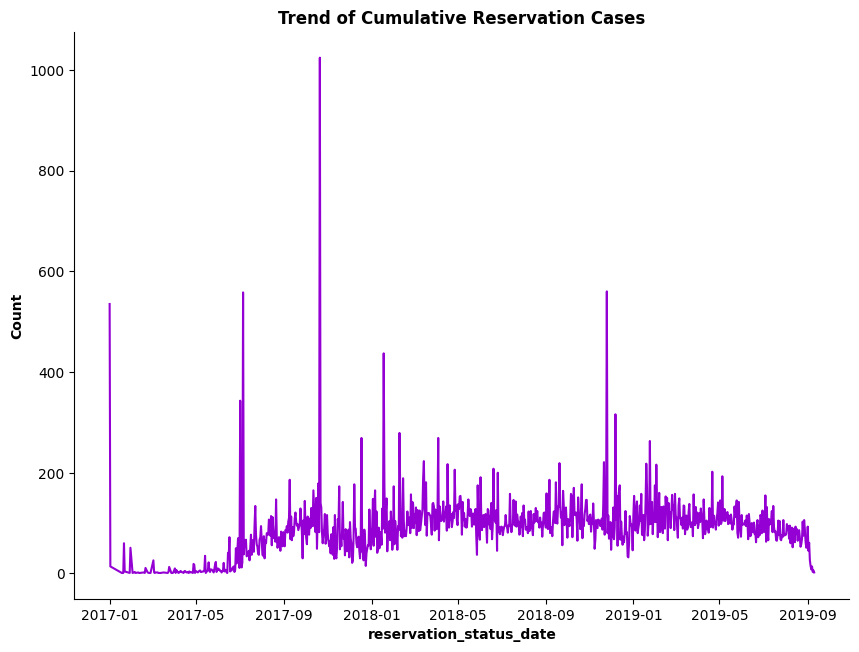

In [ ]:
# Looking for cumulative reservation cases
def plot_series(time, condition, series, series_name, series_index=0):
  fig, ax = plt.subplots(figsize=(10, 5.2))
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[time]
  ys = series['count']

  plt.plot(xs, ys, label=series_name, color='#9400d3')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(time, fontweight='bold')
  plt.ylabel('Count', fontweight='bold')

  if condition == 1:
    plt.title('Trend of Cumulative Canceled Reservation Cases', fontweight='bold')
  elif condition == 0:
    plt.title('Trend of Cumulative Non-Canceled Reservation Cases', fontweight='bold')
  else:
    plt.title('Trend of Cumulative Reservation Cases', fontweight='bold')

  if time == 'arrival_date_year':
    plt.plot(xs, ys, label=series_name, color='#9400d3', marker='o')
    plt.xticks(series[time])
    for i, count in enumerate(series['count']):
      plt.annotate(str(count), [series[time][i], count], textcoords="offset points", xytext=(-2, 10),
                  ha='center')

  plt.subplots_adjust(top=1.2)

df_sorted = reservation_date.sort_values('reservation_status_date', ascending=True)
plot_series('reservation_status_date', 'cumulative', df_sorted, '')

In [ ]:
# Looking for cumulative canceled reservation cases
def reservation_status(condition, time):
  filter_data = train_data.loc[train_data['is_canceled'] == condition]
  reservation_date = pd.DataFrame(filter_data.groupby(time).size().reset_index(name='count'))
  return reservation_date

df = reservation_status(condition = 1, time = 'reservation_status_date')
print(df['count'].sum(), ',', df['count'].median())

30730 , 25.0


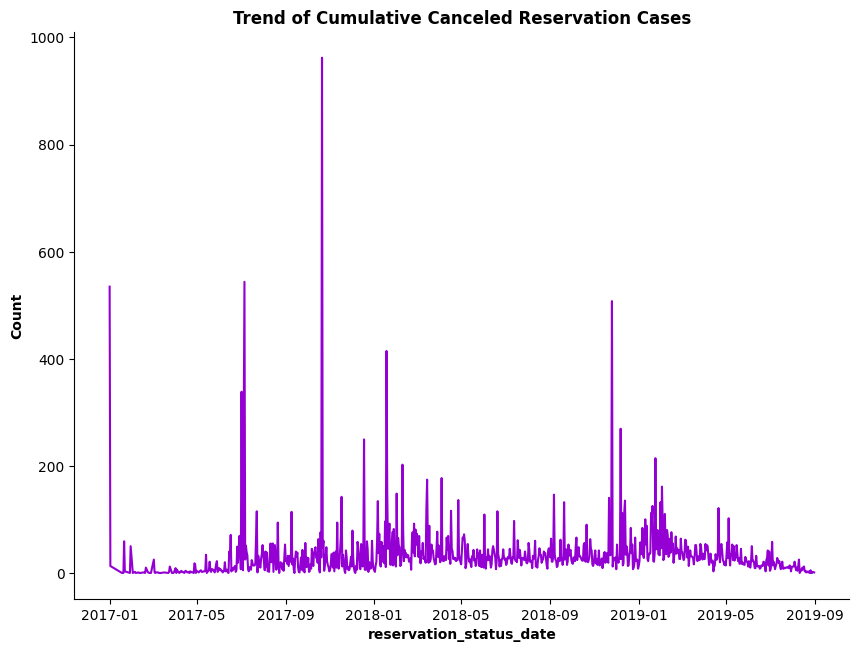

In [ ]:
# Looking for cumulative canceled reservation cases trend
df = reservation_status(condition=1, time='reservation_status_date')
df_sorted = df.sort_values('reservation_status_date', ascending=True)
plot_series('reservation_status_date', 1, df_sorted, '')

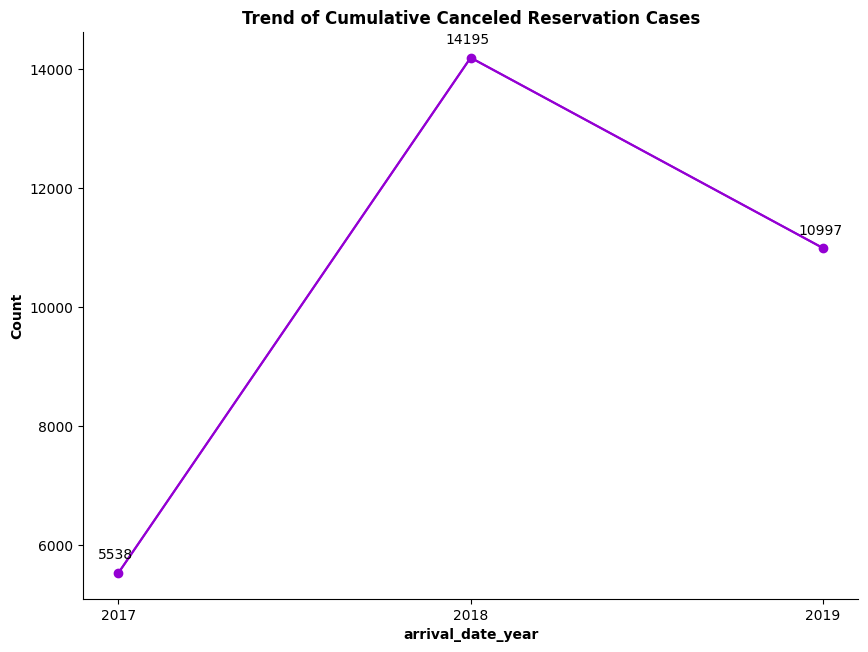

In [ ]:
# Looking for cumulative canceled reservation cases per year (TREND)
df = reservation_status(condition=1, time='arrival_date_year')
df_sorted = df.sort_values('arrival_date_year', ascending=True)
plot_series('arrival_date_year', 1, df_sorted, '')

In [ ]:
df = reservation_status(condition=0, time='reservation_status_date')
print(df['count'].sum(), ',', df['count'].median())

52371 , 65.0


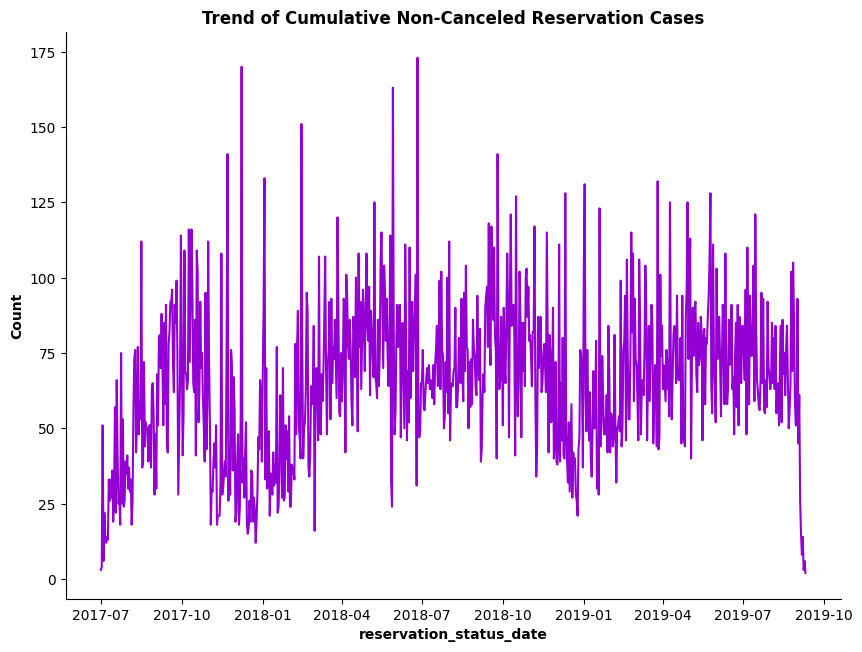

In [ ]:
# Looking for cumulative non-canceled reservation cases trend
df = reservation_status(condition=0, time='reservation_status_date')
df_sorted = df.sort_values('reservation_status_date', ascending=True)
plot_series('reservation_status_date', 0, df_sorted, '')

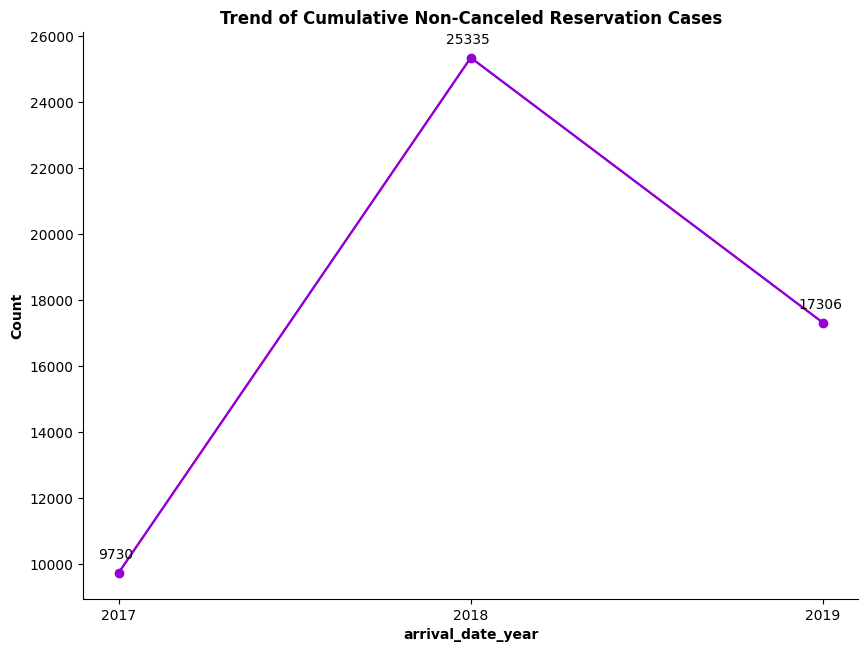

In [ ]:
# Looking for cumulative non-canceled reservation cases per year (TREND)
df = reservation_status(condition=0, time='arrival_date_year')
df_sorted = df.sort_values('arrival_date_year', ascending=True)
plot_series('arrival_date_year', 0, df_sorted, '')

## Question 2: How is reservation status by hotel characteristics?

Since there are 64 hotels, it will be hard to aggregate its characteristics, due to time variations. Hence, I will focused on 3 lowest ratio canceled-to-not canceled. This will make two sub-questions in second question.
* How is the general reservation statuses and characteristics for all hotels?
* Does hotels' characteristics related to their reservation status? A case study to 3 lowest ratio canceled-to-not canceled hotels.

Why top 3 lowest ratio canceled-to-not? The rationale is simple. If high not canceled reservations accompanied by high canceled too, means that hotel has "bad" performance. It is optimal to have high not canceled reservations and low canceled reservations, given facilities.

### Sub-Question 2 (i): How is the general reservation statuses and characteristics for all hotels?

In [ ]:
# This code cell will examine how much reservation cases of each hotel
hotel_counts = pd.DataFrame({
                              'hotel': train_data['hotel'].value_counts().index,
                              'count': train_data['hotel'].value_counts().values}).reset_index(drop=True)
hotel_counts

,hotel,count
0,Sacramento Airport Natomas Courtyard Sacrament...,1370
1,Renaissance New York Times Square Hotel New Yo...,1370
2,"Las Vegas Marriott Las Vegas, NV",1366
3,"Crystal Cove, Barbados Barbados",1357
4,"Protea Hotel by Marriott Midrand Midrand, Sout...",1351
...,...,...
59,"W New York – Union Square New York, NY",1248
60,"The House, Barbados Barbados",1246
61,Sheraton Grand Rio Hotel & Resort Rio de Janei...,1245
62,Residence Inn Rio de Janeiro Barra da Tijuca B...,1244


In [ ]:
# To describe reservation cases' distribution/descriptive statistics, we use .describe()
hotel_counts.describe()

,count
count,64.000000
mean,1298.453125
std,32.136578
min,1243.000000
25%,1274.750000
50%,1298.000000
75%,1321.000000
max,1370.000000


In [ ]:
def counts_condition(cond):
  '''
    This function will examine each hotel's reservation cases number.
    However, note that the parameter is based on 'is_canceled' status.
    "1" for canceled case, otherwise symbolized as "0".
  '''
  reservation_counts = train_data['hotel'].loc[train_data['is_canceled'] == cond].value_counts()
  return reservation_counts

'''
  Since function above produce non-DataFrame formats, I must map their values and following columns to dict.
'''

# Canceled case
hotel_canceled_counts = pd.DataFrame({
                              'hotel': counts_condition(cond=1).index,
                              'count': counts_condition(cond=1).values}).reset_index(drop=True)
hotel_canceled_counts

,hotel,count
0,"Sheraton Lima Hotel & Convention Center Lima, ...",523
1,Renaissance New York Times Square Hotel New Yo...,516
2,"Waves, Barbados Barbados",509
3,"Orlando Airport Courtyard Orlando, FL",509
4,Protea Hotel Fire & Ice! by Marriott Cape Town...,508
...,...,...
59,"The House, Barbados Barbados",449
60,"Greensboro Courtyard Greensboro, NC",439
61,Protea Hotel Fire & Ice! by Marriott Johannesb...,437
62,"Indianapolis Airport Courtyard Indianapolis, IN",435


In [ ]:
# Not-canceled case
hotel_not_canceled_counts = pd.DataFrame({
                              'hotel': counts_condition(cond=0).index,
                              'count': counts_condition(cond=0).values}).reset_index(drop=True)
hotel_not_canceled_counts

,hotel,count
0,"Las Vegas Marriott Las Vegas, NV",876
1,"Crystal Cove, Barbados Barbados",870
2,Sacramento Airport Natomas Courtyard Sacrament...,863
3,"Protea Hotel by Marriott Midrand Midrand, Sout...",861
4,Renaissance New York Times Square Hotel New Yo...,854
...,...,...
59,"African Pride Melrose Arch, Autograph Collecti...",779
60,Renaissance Santo Domingo Jaragua Hotel & Casi...,775
61,Marriott Puerto Vallarta Resort & Spa Puerto V...,773
62,Sheraton Mexico City Maria Isabel Hotel Mexico...,769


Motives from this cell: I want to merge hotel_canceled_counts and hotel_not_canceled_counts. Why? I want to measure the ratio canceled-to-not canceled and map them in one table.

Requirements of the table:
* Since the hotel name is unique, it enable us to make it as "primary key" of left table (hotel_not_canceled_counts) and merge it with the right table hotel_canceled_counts.
* To do so, I need to sort both table by each alphabetical order.

In [ ]:
hotel_canceled_sorted = hotel_canceled_counts.sort_values('hotel', ascending=True)
hotel_not_canceled_sorted = hotel_not_canceled_counts.sort_values('hotel', ascending=True)

hotel_new_df = pd.merge(hotel_not_canceled_sorted, hotel_canceled_sorted, on='hotel', how='left')
hotel_new_df.rename(columns={'count_x': 'not_canceled_bookings', 'count_y': 'canceled_bookings'}, inplace=True)

hotel_new_df['ratio'] = (hotel_new_df['canceled_bookings'] / hotel_new_df['not_canceled_bookings']).round(2)
hotel_new_df

,hotel,not_canceled_bookings,canceled_bookings,ratio
0,"African Pride Melrose Arch, Autograph Collecti...",779,464,0.60
1,"Albuquerque Airport Courtyard Albuquerque, NM",840,481,0.57
2,"Anaheim Marriott Anaheim, CA",823,482,0.59
3,"Baltimore BWI Airport Courtyard Linthicum, MD",817,506,0.62
4,Baton Rouge Acadian Centre/LSU Area Courtyard ...,847,483,0.57
...,...,...,...,...
59,"W Barcelona Barcelona, Spain",844,478,0.57
60,"W London – Leicester Square London, United Kin...",845,482,0.57
61,"W New York – Times Square New York, NY",794,459,0.58
62,"W New York – Union Square New York, NY",793,455,0.57


<Axes: >

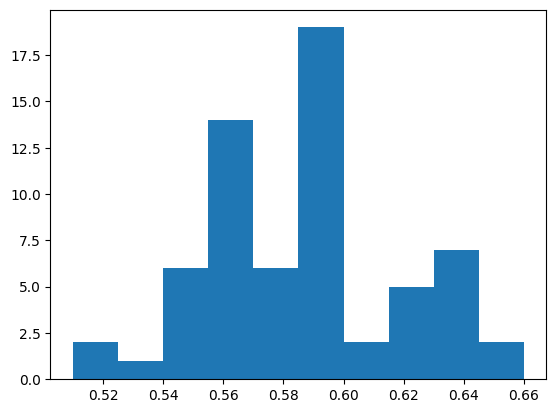

In [ ]:
hotel_new_df['ratio'].hist(grid=False)

In [ ]:
hotel_new_df['ratio'].describe()

count    64.000000
mean      0.587969
std       0.031931
min       0.510000
25%       0.570000
50%       0.590000
75%       0.602500
max       0.660000
Name: ratio, dtype: float64

In [ ]:
# In this code cell, we got lowest canceled-to-not canceled bookings.
# These hotels will further analyzed in sub-question 2 (ii)
top_3_hotel = hotel_new_df.sort_values('ratio', ascending=True).head(3)
top_3_hotel

,hotel,not_canceled_bookings,canceled_bookings,ratio
23,"Indianapolis Airport Courtyard Indianapolis, IN",853,435,0.51
49,Spokane Downtown at the Convention Center Cour...,844,435,0.52
34,Protea Hotel Fire & Ice! by Marriott Johannesb...,829,437,0.53


#### General Meal Aspect

In [ ]:
meals = train_data['meal'].unique()
agg_train_data_meals = []

for m in meals:
  process = train_data.loc[train_data['meal'] == m].groupby('meal').size().reset_index(name='count')
  agg_train_data_meals.append(process)

agg_train_data_meals_df = pd.concat(agg_train_data_meals, ignore_index=True)
agg_train_data_meals_df

,meal,count
0,BB,64304
1,HB,10092
2,SC,7335
3,FB,542
4,Undefined,828


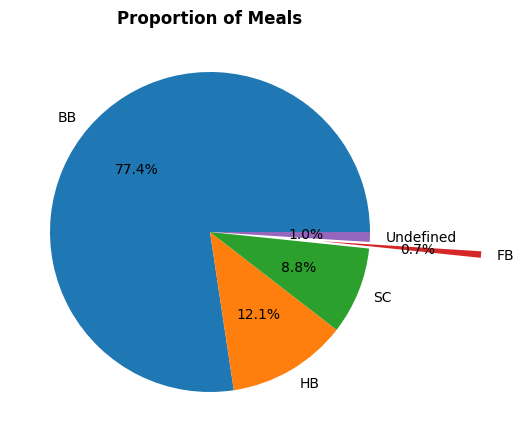

In [ ]:
# Visualization of overall meal characteristics
explosion = [0, 0, 0, 0.7, 0]

fig, ax = plt.subplots(figsize=[5, 12])

labels = agg_train_data_meals_df['meal']
pie_graph = ax.pie(agg_train_data_meals_df['count'], labels=labels.unique(), autopct = '%1.1f%%', explode=explosion)

plt.subplots_adjust(left=0.1,
            bottom=0.1,
            right=0.9,
            top=0.9,
            wspace=0.4,
            hspace=0.4)

plt.title('Proportion of Meals', fontweight='bold')
plt.show()

#### General Room Type Aspect

Text(0, 0.5, 'Count')

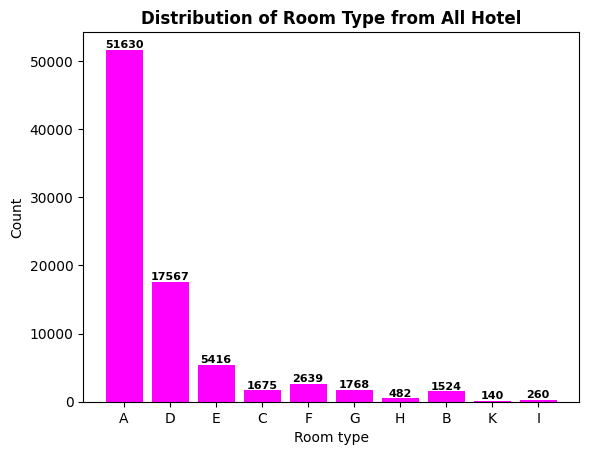

In [ ]:
type_room = train_data['assigned_room_type'].unique()
agg_train_data_type_room = []

for tr in type_room:
  process = train_data.loc[train_data['assigned_room_type'] == tr].groupby('assigned_room_type').size().reset_index(name='count')
  agg_train_data_type_room.append(process)

agg_train_data_type_room_df = pd.concat(agg_train_data_type_room, ignore_index=True)

# Make the bar chart
bar_chart = plt.bar(agg_train_data_type_room_df['assigned_room_type'], agg_train_data_type_room_df['count'],
                    color='magenta')
plt.bar_label(bar_chart, label_type='edge', fontsize=8, fontweight='bold', color='black')
plt.title('Distribution of Room Type from All Hotel', fontweight='bold')
plt.xlabel('Room type')
plt.ylabel('Count')

#### General Type Difference Aspect

Text(0, 0.5, 'Count')

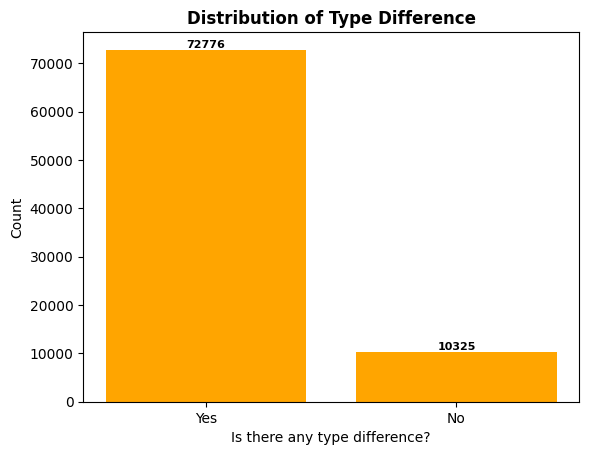

In [ ]:
type_difference = train_data['type_difference'].unique()
agg_type_difference = []

for d in type_difference:
  process = train_data.loc[train_data['type_difference'] == d].groupby('type_difference').size().reset_index(name='count')
  agg_type_difference.append(process)

agg_type_difference_df = pd.concat(agg_type_difference, ignore_index=True)

# Make the bar chart
bar_chart = plt.bar(agg_type_difference_df['type_difference'], agg_type_difference_df['count'], color='orange')
plt.bar_label(bar_chart, label_type='edge', fontsize=8, fontweight='bold', color='black')
plt.title('Distribution of Type Difference', fontweight='bold')
plt.xlabel('Is there any type difference?')
plt.ylabel('Count')

###Sub-Question 2 (ii): Does hotels' characteristics related to their reservation status? A case study to 3 lowest ratio canceled-to-not canceled hotels.


#### Meal Aspect

In [ ]:
top_3_hotel_filter = top_3_hotel['hotel'].unique()
train_data_meals = []

for h in top_3_hotel_filter:
  '''
    This loop will iterate to count meal type. Iteration based on hotels on top_3_hotel_filter
  '''
  process = train_data.loc[train_data['hotel'] == h].groupby(['hotel', 'meal']).size().reset_index(name='count')
  train_data_meals.append(process)

top_3_meals_df = pd.concat(train_data_meals, ignore_index=True)
top_3_meals_df

,hotel,meal,count
0,"Indianapolis Airport Courtyard Indianapolis, IN",BB,999
1,"Indianapolis Airport Courtyard Indianapolis, IN",FB,9
2,"Indianapolis Airport Courtyard Indianapolis, IN",HB,154
3,"Indianapolis Airport Courtyard Indianapolis, IN",SC,118
4,"Indianapolis Airport Courtyard Indianapolis, IN",Undefined,8
5,Spokane Downtown at the Convention Center Cour...,BB,993
6,Spokane Downtown at the Convention Center Cour...,FB,3
7,Spokane Downtown at the Convention Center Cour...,HB,182
8,Spokane Downtown at the Convention Center Cour...,SC,88
9,Spokane Downtown at the Convention Center Cour...,Undefined,13


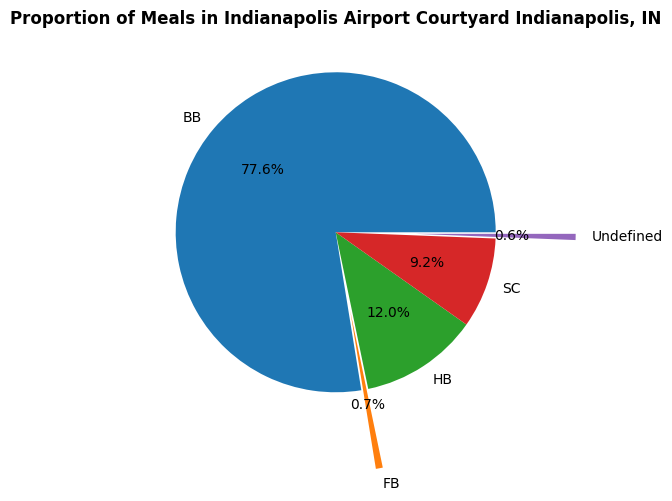

In [ ]:
def top_3_meals_df_graph(hotels, figsize=(5, 12)):
  explosion = [0, 0.5, 0, 0, 0.5]

  fig, ax = plt.subplots(figsize=figsize)

  labels = top_3_meals_df['meal']
  pie_graph = ax.pie(top_3_meals_df['count'].loc[top_3_meals_df['hotel']==hotels],
                              labels=labels.unique(), autopct = '%1.1f%%', explode=explosion)

  plt.subplots_adjust(left=0.1,
            bottom=0.1,
            right=0.9,
            top=0.9,
            wspace=0.4,
            hspace=0.4)

  plt.title(f'Proportion of Meals in {hotels}', fontweight='bold')
  plt.show()

top_3_meals_df_graph(hotels='Indianapolis Airport Courtyard Indianapolis, IN')

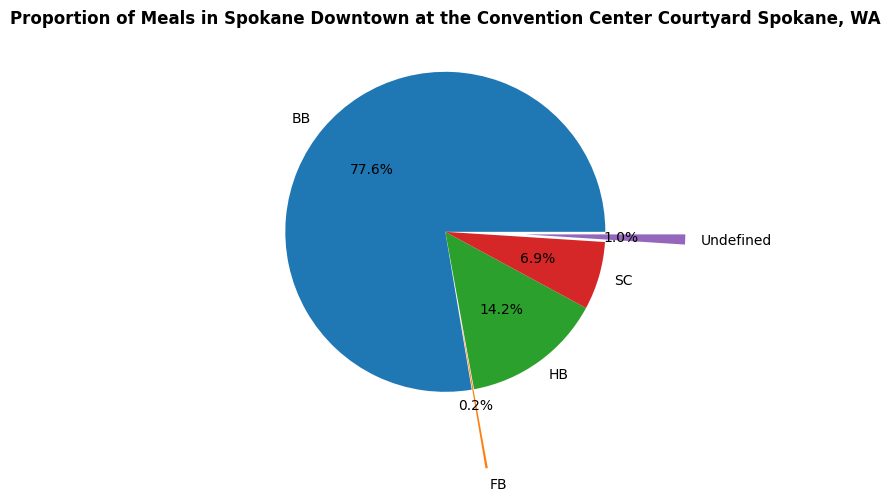

In [ ]:
top_3_meals_df_graph(hotels='Spokane Downtown at the Convention Center Courtyard Spokane, WA')

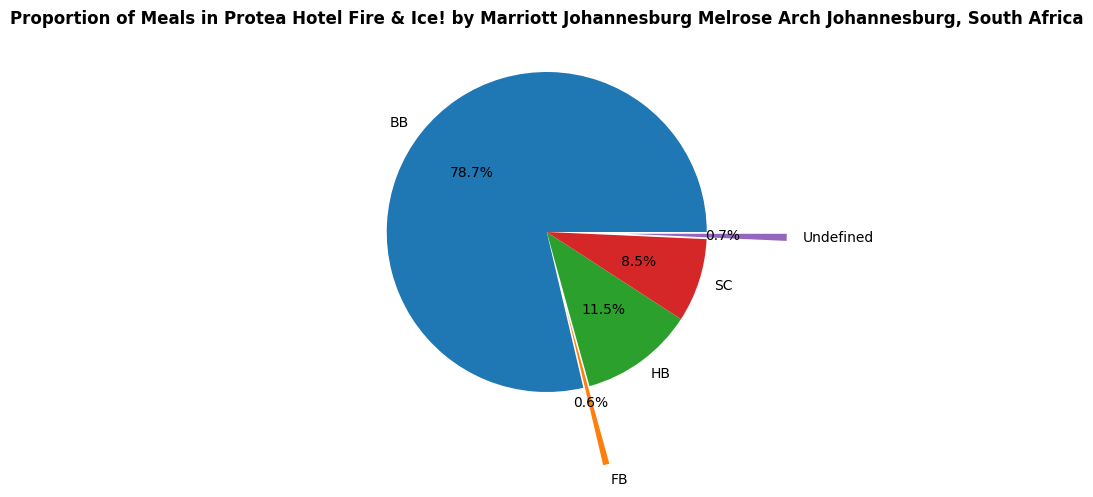

In [ ]:
top_3_meals_df_graph(hotels='Protea Hotel Fire & Ice! by Marriott Johannesburg Melrose Arch Johannesburg, South Africa')

#### Room Type Aspect

In [ ]:
# Examine specific top 3 room type
top_3_hotel_filter = top_3_hotel['hotel'].unique()
train_data_room_type = []

for h in top_3_hotel_filter:
  '''
    This loop will iterate to count room type. Iteration based on hotels on top_3_hotel_filter
  '''
  process = train_data.loc[train_data['hotel'] == h].groupby(['hotel', 'assigned_room_type']).size().reset_index(name='count')
  train_data_room_type.append(process)

top_3_room_type_df = pd.concat(train_data_room_type, ignore_index=True)
top_3_room_type_df

,hotel,assigned_room_type,count
0,"Indianapolis Airport Courtyard Indianapolis, IN",A,786
1,"Indianapolis Airport Courtyard Indianapolis, IN",B,23
2,"Indianapolis Airport Courtyard Indianapolis, IN",C,29
3,"Indianapolis Airport Courtyard Indianapolis, IN",D,273
4,"Indianapolis Airport Courtyard Indianapolis, IN",E,91
5,"Indianapolis Airport Courtyard Indianapolis, IN",F,44
6,"Indianapolis Airport Courtyard Indianapolis, IN",G,27
7,"Indianapolis Airport Courtyard Indianapolis, IN",H,5
8,"Indianapolis Airport Courtyard Indianapolis, IN",I,7
9,"Indianapolis Airport Courtyard Indianapolis, IN",K,3


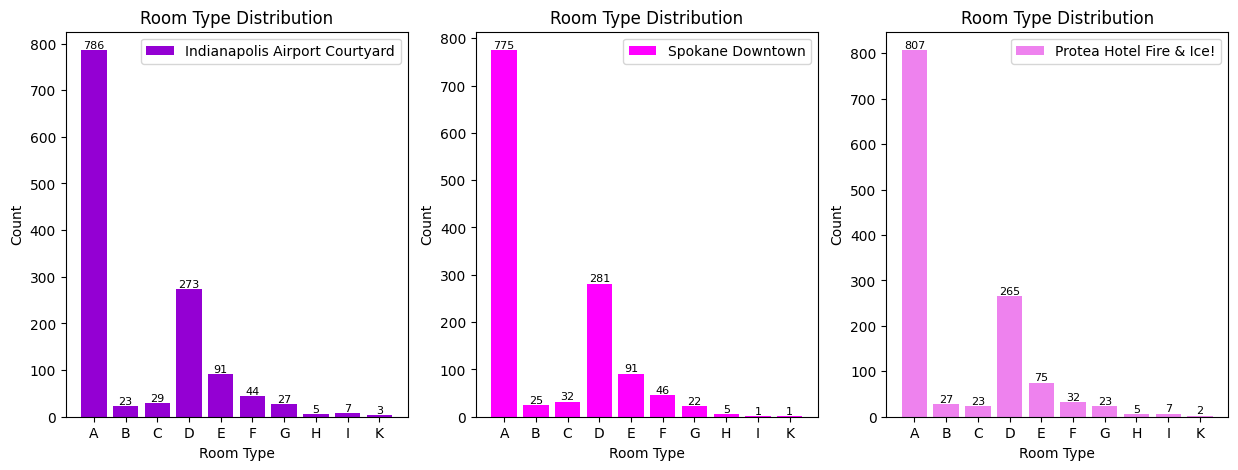

In [ ]:
def type_room_df_graph(hotels, figsize=(15, 5)):
    fig, axs = plt.subplots(1, 3, figsize=figsize)
    colors = ['#9400d3', 'magenta', 'violet']

    # Loop through hotels and corresponding subplot index
    for i, (hotel, color) in enumerate(zip(hotels, colors)):
        axs[i]
        data_for_hotel = top_3_room_type_df[top_3_room_type_df['hotel'] == hotel]

        # Add labels to the bars with specified color
        bar_chart = axs[i].bar(data_for_hotel['assigned_room_type'], data_for_hotel['count'], label=hotel, color=color)
        axs[i].bar_label(axs[i].containers[0], label_type='edge', fontsize=8, color='black')

        axs[i].set_xlabel('Room Type')
        axs[i].set_ylabel('Count')
        axs[i].set_title('Room Type Distribution')

        # Title setting given the condition
        if hotel == 'Indianapolis Airport Courtyard Indianapolis, IN':
          axs[i].legend(['Indianapolis Airport Courtyard'])
        elif hotel == 'Spokane Downtown at the Convention Center Courtyard Spokane, WA':
          axs[i].legend(['Spokane Downtown'])
        else:
          axs[i].legend(['Protea Hotel Fire & Ice!'])

    plt.show()

# List of hotels
top_3_hotel_list = [
    'Indianapolis Airport Courtyard Indianapolis, IN',
    'Spokane Downtown at the Convention Center Courtyard Spokane, WA',
    'Protea Hotel Fire & Ice! by Marriott Johannesburg Melrose Arch Johannesburg, South Africa'
]

# Call the function with the list of hotels
type_room_df_graph(hotels=top_3_hotel_list)


#### Type Difference Aspect

In [ ]:
top_3_hotel_filter = top_3_hotel['hotel'].unique()
hotels_type_difference = []

for h in top_3_hotel_filter:
  '''
    This loop will iterate to count type-difference aspect. Iteration based on hotels on top_3_hotel_filter
  '''
  process = train_data.loc[train_data['hotel'] == h].groupby(['hotel', 'type_difference']).size().reset_index(name='count')
  hotels_type_difference.append(process)

top_3_hotel_type_difference_df = pd.concat(hotels_type_difference, ignore_index=True)
top_3_hotel_type_difference_df

,hotel,type_difference,count
0,"Indianapolis Airport Courtyard Indianapolis, IN",No,174
1,"Indianapolis Airport Courtyard Indianapolis, IN",Yes,1114
2,Spokane Downtown at the Convention Center Cour...,No,176
3,Spokane Downtown at the Convention Center Cour...,Yes,1103
4,Protea Hotel Fire & Ice! by Marriott Johannesb...,No,145
5,Protea Hotel Fire & Ice! by Marriott Johannesb...,Yes,1121


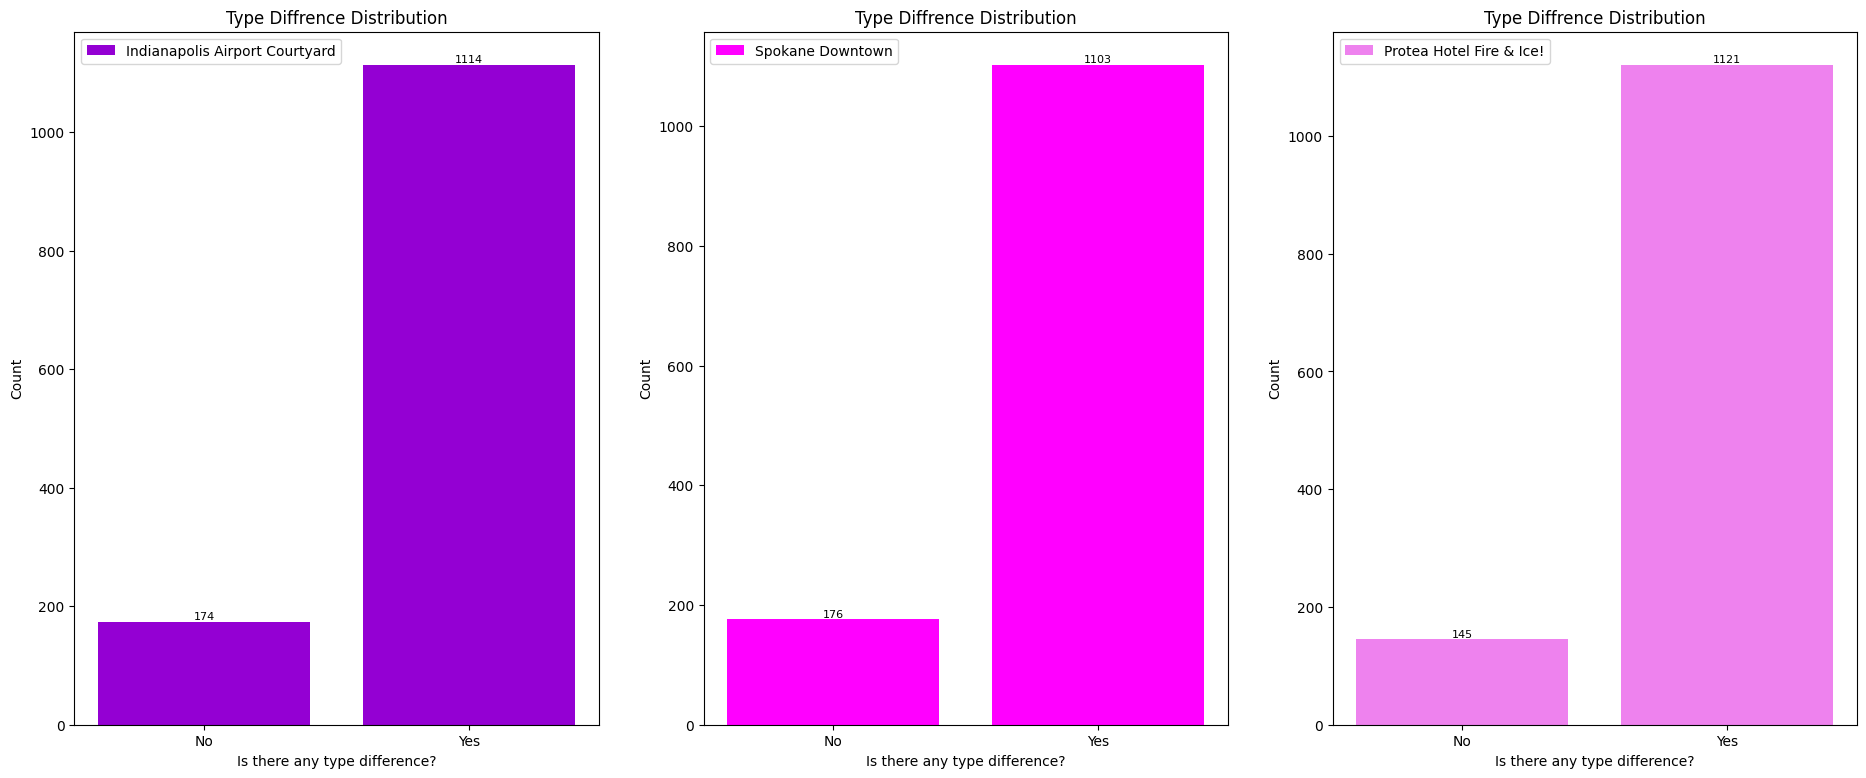

In [ ]:
def top_3_type_difference_graph(hotels, figsize=(23, 9)):
    fig, axs = plt.subplots(1, 3, figsize=figsize)
    colors = ['#9400d3', 'magenta', 'violet']

    # Loop through hotels and corresponding subplot index
    for i, (hotel, color) in enumerate(zip(hotels, colors)):
        axs[i]

        data_for_hotel = top_3_hotel_type_difference_df[top_3_hotel_type_difference_df['hotel'] == hotel]

        # Add labels to the bars with specified color
        bar_chart = axs[i].bar(data_for_hotel['type_difference'], data_for_hotel['count'], label=hotel, color=color)
        axs[i].bar_label(axs[i].containers[0], label_type='edge', fontsize=8, color='black')

        axs[i].set_xlabel('Is there any type difference?')
        axs[i].set_ylabel('Count')
        axs[i].set_title('Type Diffrence Distribution')

        # Title setting given the condition
        if hotel == 'Indianapolis Airport Courtyard Indianapolis, IN':
          axs[i].legend(['Indianapolis Airport Courtyard'], loc='upper left')
        elif hotel == 'Spokane Downtown at the Convention Center Courtyard Spokane, WA':
          axs[i].legend(['Spokane Downtown'], loc='upper left')
        else:
          axs[i].legend(['Protea Hotel Fire & Ice!'], loc='upper left')

    plt.show()

# List of hotels
top_3_hotel_list = [
    'Indianapolis Airport Courtyard Indianapolis, IN',
    'Spokane Downtown at the Convention Center Courtyard Spokane, WA',
    'Protea Hotel Fire & Ice! by Marriott Johannesburg Melrose Arch Johannesburg, South Africa'
]

# Call the function with the list of hotels
top_3_type_difference_graph(hotels=top_3_hotel_list)


## Question 3: How does booking reservation status related to hotel performance, specifically by ADR (Average Daily Rate) metrics?

<ipython-input-25-72cf4630851c>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_yearly = adr_profile.groupby('arrival_date_year').median().reset_index().rename(columns={"adr":"median_adr"})


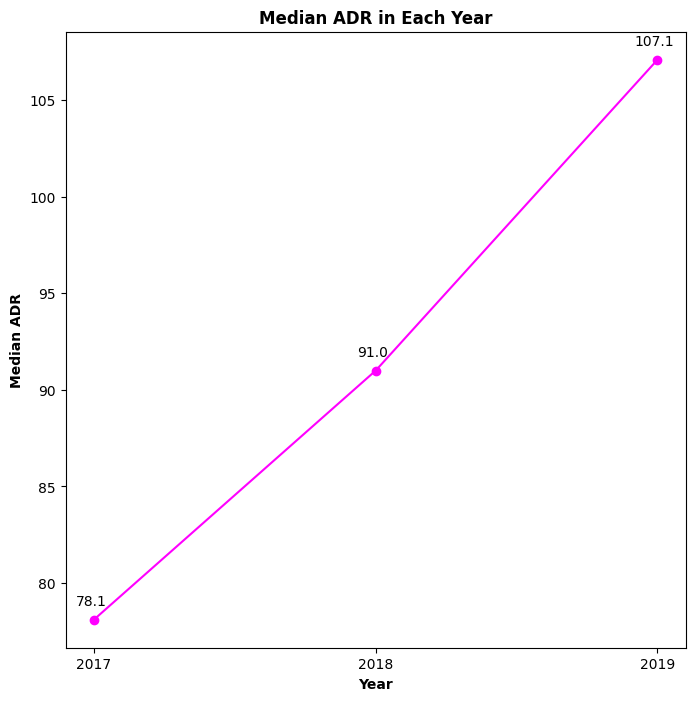

In [ ]:
# Looking for ADR patterns by Year
adr_profile = train_data[['hotel', 'arrival_date', 'arrival_date_year', 'adr', 'type_difference']]

median_yearly = adr_profile.groupby('arrival_date_year').median().reset_index().rename(columns={"adr":"median_adr"})
median_yearly['median_adr'] = median_yearly['median_adr'].round(1)

# Make the line chart
fig, ax = plt.subplots(figsize=[8, 8])
median_chart = ax.plot(median_yearly['arrival_date_year'], median_yearly['median_adr'], marker='o', color='magenta')
ax.set_xticks(median_yearly['arrival_date_year'])
ax.set_title('Median ADR in Each Year', fontweight='bold')
ax.set_xlabel('Year', fontweight='bold')
ax.set_ylabel('Median ADR', fontweight='bold')

for i, count in enumerate(median_yearly['median_adr']):
  plt.annotate(str(count), [median_yearly['arrival_date_year'][i], count], textcoords="offset points", xytext=(-2, 10),
                  ha='center')

<ipython-input-26-12cd3e259233>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_per_date = adr_profile.groupby('arrival_date').median().reset_index().rename(columns={"adr":"median_adr"})


Text(0.5, 1.0, 'Median ADR per Specific Date')

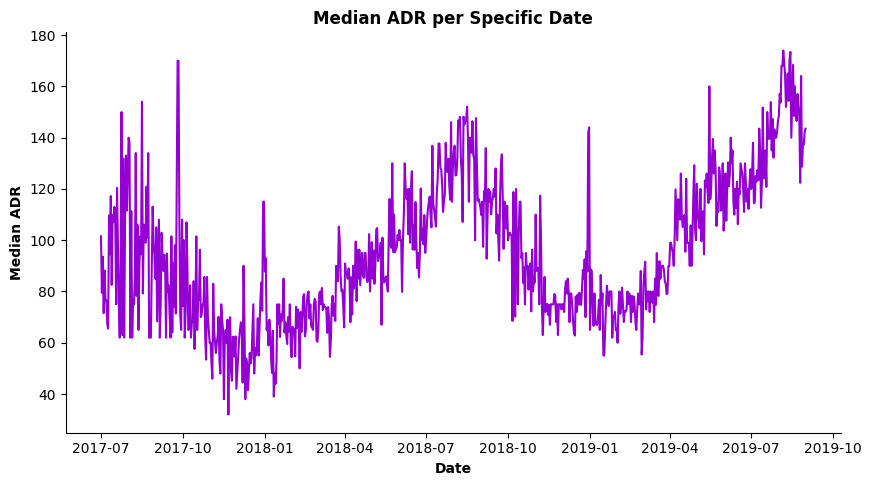

In [ ]:
# Looking for ADR patterns in each date
median_per_date = adr_profile.groupby('arrival_date').median().reset_index().rename(columns={"adr":"median_adr"})

# Make the plot

fig, ax = plt.subplots(figsize=(10, 5.2))
palette = list(sns.palettes.mpl_palette('Dark2'))
xs = median_per_date['arrival_date']
ys = median_per_date['median_adr']

plt.plot(xs, ys, color='#9400d3')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date', fontweight='bold')
plt.ylabel('Median ADR', fontweight='bold')
plt.title('Median ADR per Specific Date', fontweight='bold')

In [ ]:
median_adr_per_hotel = adr_profile.groupby(['hotel','arrival_date_year']).median().reset_index().rename(columns={"adr":"median_adr"})
median_adr_per_hotel

<ipython-input-55-22dacf7af43b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_yearly = adr_profile.groupby(['hotel','arrival_date_year']).median().reset_index().rename(columns={"adr":"median_adr"})


,hotel,arrival_date_year,median_adr,is_canceled
0,"African Pride Melrose Arch, Autograph Collecti...",2017,79.695,0.0
1,"African Pride Melrose Arch, Autograph Collecti...",2018,93.800,0.0
2,"African Pride Melrose Arch, Autograph Collecti...",2019,104.335,0.0
3,"Albuquerque Airport Courtyard Albuquerque, NM",2017,76.500,0.0
4,"Albuquerque Airport Courtyard Albuquerque, NM",2018,90.000,0.0
...,...,...,...,...
187,"W New York – Union Square New York, NY",2018,90.000,0.0
188,"W New York – Union Square New York, NY",2019,103.000,0.0
189,"Waves, Barbados Barbados",2017,80.000,0.0
190,"Waves, Barbados Barbados",2018,90.670,0.0


<ipython-input-69-17a93d94bb31>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_yearly = adr_profile.groupby(['hotel','arrival_date_year']).median().reset_index().rename(columns={"adr":"median_adr"})


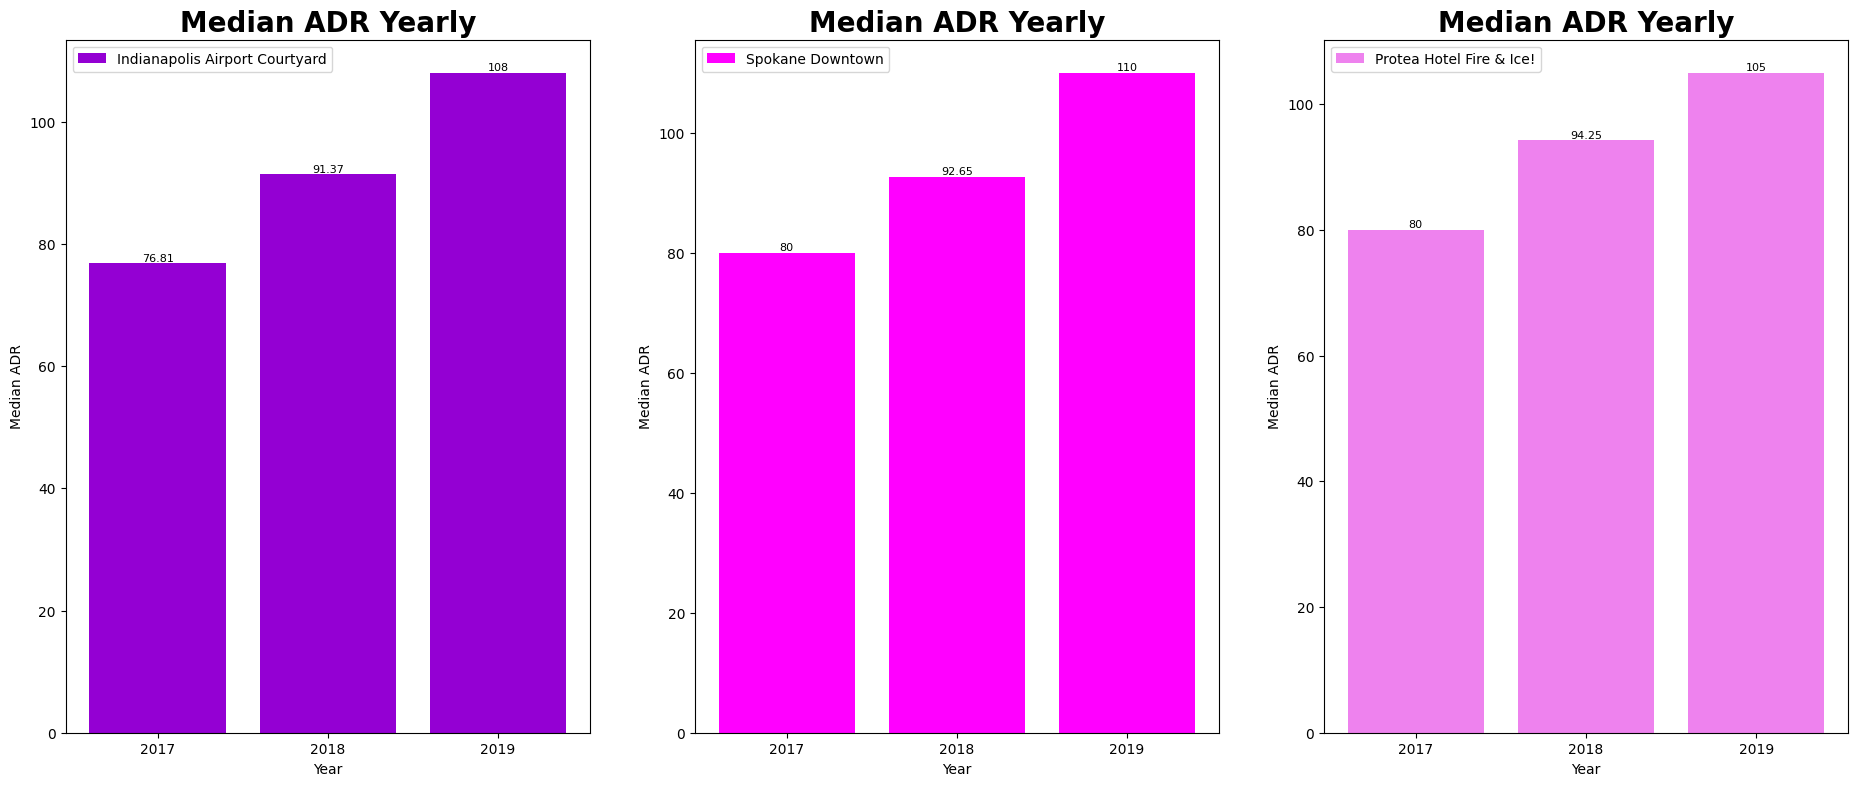

In [ ]:
# This variable is called just to recall our base filter on median_adr_yearly_top_3
median_adr_per_hotel

# Make a variable for top 3's median adr (yearly).
# Note: Top 3 based on the LOWEST ratio canceled-to-not canceled cases. Means that the hotels perform relatively well
median_adr_yearly_top_3 = median_adr_per_hotel.loc[
                        (median_adr_per_hotel['hotel'] == 'Indianapolis Airport Courtyard Indianapolis, IN') |
                        (median_adr_per_hotel['hotel'] == 'Spokane Downtown at the Convention Center Courtyard Spokane, WA') |
                        (median_adr_per_hotel['hotel'] == 'Protea Hotel Fire & Ice! by Marriott Johannesburg Melrose Arch Johannesburg, South Africa')
                        ]

def median_adr_yearly_top_3(hotels, figsize=(23, 9)):
    fig, axs = plt.subplots(1, 3, figsize=figsize)
    colors = ['#9400d3', 'magenta', 'violet']

    # Loop through hotels and corresponding subplot index
    for i, (hotel, color) in enumerate(zip(hotels, colors)):
        axs[i]

        data_for_hotel = median_adr_yearly_top_3[median_adr_yearly_top_3['hotel'] == hotel]

        # Add labels to the bars with specified color
        bars = axs[i].bar(data_for_hotel['arrival_date_year'], data_for_hotel['median_adr'],
                          label=hotel, color=color)
        axs[i].bar_label(bars, label_type='edge', fontsize=8, color='black')

        # Set X-coordinate values
        axs[i].set_xticks(data_for_hotel['arrival_date_year'])

        # Set coordinate labels and title
        axs[i].set_xlabel('Year')
        axs[i].set_ylabel('Median ADR')
        axs[i].set_title('Median ADR Yearly', fontsize=20, fontweight='bold')

        # Set title given condition
        if hotel == 'Indianapolis Airport Courtyard Indianapolis, IN':
            axs[i].legend(['Indianapolis Airport Courtyard'], loc='upper left')
        elif hotel == 'Spokane Downtown at the Convention Center Courtyard Spokane, WA':
            axs[i].legend(['Spokane Downtown'], loc='upper left')
        else:
            axs[i].legend(['Protea Hotel Fire & Ice!'], loc='upper left')

    plt.show()

# List of hotels
top_3_hotel_list = [
    'Indianapolis Airport Courtyard Indianapolis, IN',
    'Spokane Downtown at the Convention Center Courtyard Spokane, WA',
    'Protea Hotel Fire & Ice! by Marriott Johannesburg Melrose Arch Johannesburg, South Africa'
]

# Call the function with the list of hotels
median_adr_yearly_top_3(hotels=top_3_hotel_list)


# Model Selection

## Feature Engineering

The target variable was originally 'is_canceled'. However, since the test data does not have 'is_canceled' column, I have to shift to our "best" proxy for 'is_canceled': 'reservation_status'.

In [ ]:
# Understand the target variable
train_data['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [ ]:
# Categorical encoding since it has >2 category.
reservation_status_classes = pd.factorize(train_data['reservation_status'])[1]
reservation_status_classes

Index(['Check-Out', 'Canceled', 'No-Show'], dtype='object')

In [ ]:
train_data['reservation_status'] = pd.factorize(train_data['reservation_status'])[0]
train_data['reservation_status']

0        0
1        1
2        1
3        0
4        1
        ..
83288    0
83289    0
83290    0
83291    0
83292    0
Name: reservation_status, Length: 83101, dtype: int64

In [ ]:
train_data['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [ ]:
# One hot encoding type_difference
train_data_encoded = pd.get_dummies(train_data, columns=['type_difference'], drop_first=True)

In [ ]:
correlation = train_data_encoded.corr()['reservation_status'].abs().sort_values(ascending = False)
correlation

<ipython-input-59-0c2ccf3956d8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = train_data_encoded.corr()['reservation_status'].abs().sort_values(ascending = False)


reservation_status                1.000000
is_canceled                       0.980305
lead_time                         0.268333
type_difference_Yes               0.231165
total_of_special_requests         0.225112
required_car_parking_spaces       0.189503
booking_changes                   0.136923
previous_cancellations            0.099305
is_repeated_guest                 0.090622
previous_bookings_not_canceled    0.053605
days_in_waiting_list              0.048957
adults                            0.047257
agent                             0.047039
adr                               0.041664
babies                            0.032320
stays_in_week_nights              0.025832
arrival_date_year                 0.020813
children                          0.007394
stays_in_weekend_nights           0.005434
bookingID                         0.002202
arrival_date_day_of_month         0.002069
arrival_date_week_number          0.001364
Name: reservation_status, dtype: float64

<ipython-input-50-3d86cc8ebfa0>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(train_data_encoded.corr(), vmin=-1, vmax=1, annot=False, linecolor='black')


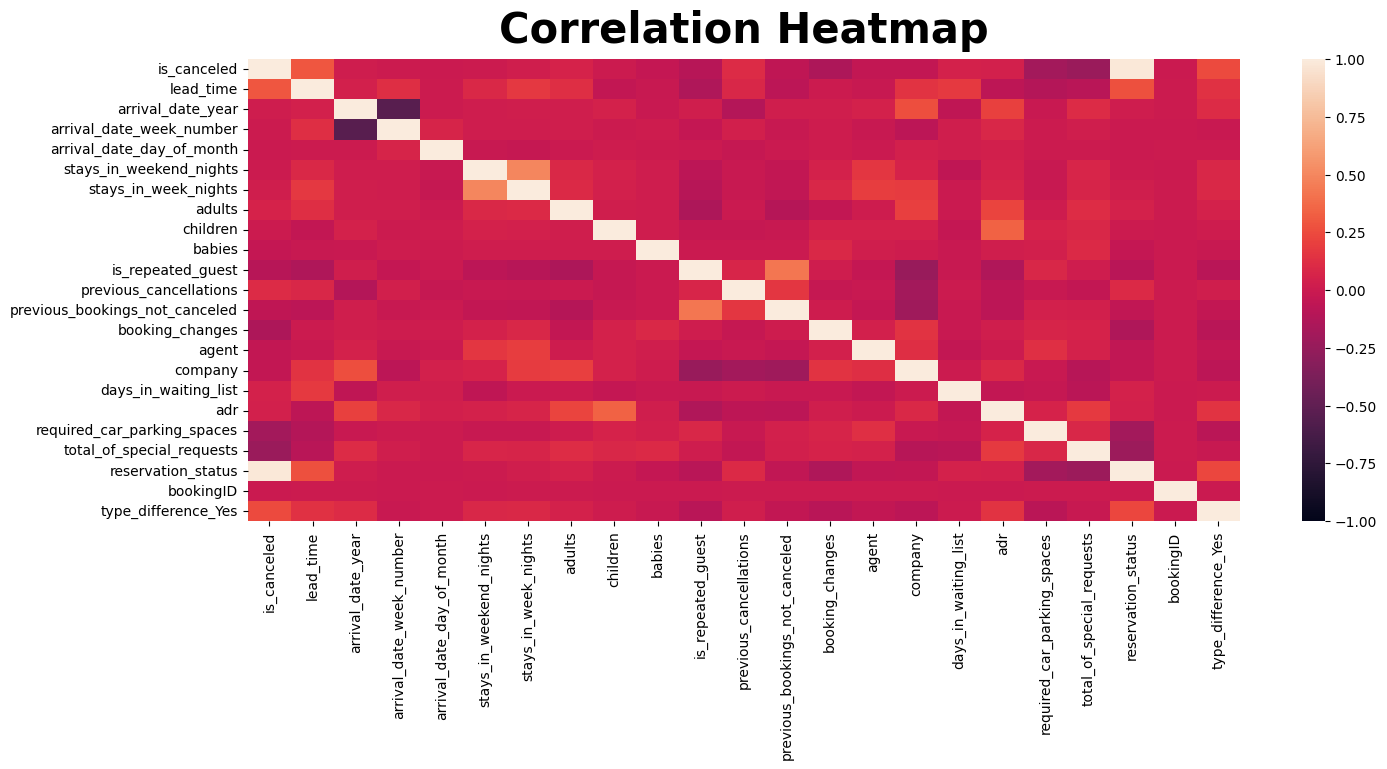

In [ ]:
# Make a figure for heatmap correlation plot
plt.figure(figsize=(16, 6))

# Store the heatmap class to "heatmap" variable
# Set the range of values to be displayed on the colormap from -1 to 1 (correlation coefficient),
# Set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(train_data_encoded.corr(), vmin=-1, vmax=1, annot=False, linecolor='black')

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontsize=30, fontweight='bold', pad=12)

In [ ]:
# Store the feature (x) and target variable (y) to numpy array
# Reshape the array to have (n rows, 7 columns) for X and (n rows, 1 columns) for Y
X = np.array(train_data_encoded[[
                                 'lead_time',
                                 'type_difference_Yes',
                                 'total_of_special_requests',
                                 'required_car_parking_spaces',
                                 'booking_changes',
                                 'previous_cancellations',
                                 'is_repeated_guest',
                                 ]]).reshape(-1, 7)
y = np.array(train_data_encoded['reservation_status']).reshape(-1, 1)

In [ ]:
# Initialization with X (features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dimensionality reduction with 5 components
pca = PCA(n_components= 5)
X_pca = pca.fit_transform(X_scaled)

# Looking for explained variance proportion
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

Explained Variance Ratio: [0.1986376  0.15541189 0.14501775 0.13991683 0.12775104]


## Model: K-Fold Validation

In [ ]:
# Decision Tree as Predictor Model
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=123)

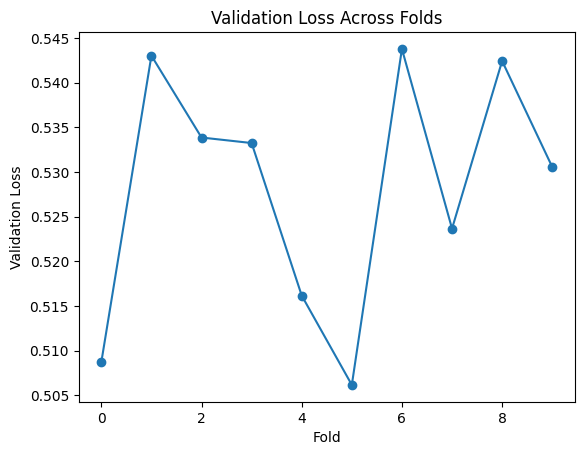

In [ ]:
# K-Fold initialization to do cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=0)

# List initialization to store each fold's losses
validation_losses = []


# Validation iteration (10 iterations)
for train_index, val_index in kfold.split(X_pca, y):
    '''
      Mechanism of this for loop:
        First, splitting our train data into sub-train and sub-validation.
        Second, training our model with sub-train data.
        Third, trying our prediction model with sub-validation as "dummy test data".
        Fourth, calculating losses between predicted data (Y_Val_hat) and sub-validation data (Y_Val).
        Fifth, store the losses to validation_losses list variable
    '''
    X_train, X_val = X_pca[train_index], X_pca[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Training model
    clf.fit(X_train, y_train)

    # Calculating loss on each set of validation's folds
    pred = clf.predict_proba(X_val)
    eval = log_loss(y_val, pred)
    validation_losses.append(eval)

# Show validation losses graph
plt.plot(validation_losses, marker='o')
plt.xlabel('Fold')
plt.ylabel('Validation Loss')
plt.title('Validation Loss Across Folds')
plt.show()


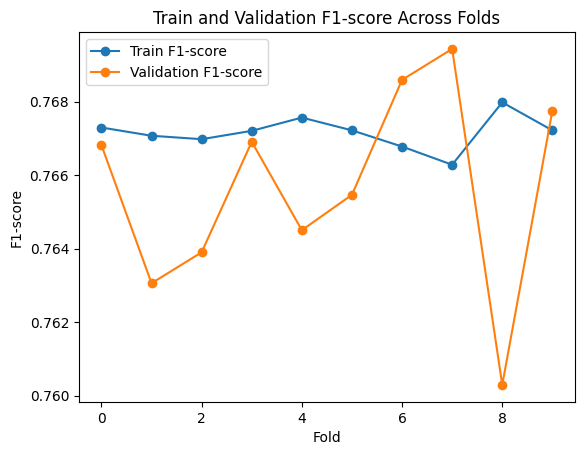

In [ ]:
# The objective of this code section is compare Train's and Validation's F1-Scores.

# K-Fold initialization to do cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=0)

# List initialization to store each fold's F1-Scores and training's F1-Scores
train_f1_scores = []
validation_f1_scores = []

# Validation iteration (10 iterations)
for train_index, val_index in kfold.split(X_pca, y):
    '''
      Mechanism of the loop:
        1. Split train data to sub-train and sub-validation data.
        2. Train our predictor model.
        3. Doing prediction based on sub-train data and look the F1-Score.
        4. Doing prediction based on sub-validation data and look the F1-Score.
    '''
    X_train, X_val = X_pca[train_index], X_pca[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Training model
    clf.fit(X_train, y_train)

    # Prediction based on sub-train data
    y_train_pred = clf.predict(X_train)
      # Micro average is used to handle F1-Score within imbalanced data
    train_f1 = f1_score(y_train, y_train_pred, average='micro')
    train_f1_scores.append(train_f1)

    # Prediction based on sub-validation data
    y_val_pred = clf.predict(X_val)
    validation_f1 = f1_score(y_val, y_val_pred, average='micro')
    validation_f1_scores.append(validation_f1)

# Show F1-Score comparisons graph
plt.plot(train_f1_scores, label='Train F1-score', marker='o')
plt.plot(validation_f1_scores, label='Validation F1-score', marker='o')
plt.xlabel('Fold')
plt.ylabel('F1-score')
plt.title('Train and Validation F1-score Across Folds')
plt.legend()
plt.show()


In [ ]:
f1_micro_scorer = make_scorer(f1_score, average='micro')
scores = cross_val_score(clf, X_pca, y, cv=10, scoring=f1_micro_scorer)

In [ ]:
scores

array([0.76308507, 0.76474128, 0.77160048, 0.76233454, 0.75812274,
       0.77268351, 0.75691937, 0.77737665, 0.76919374, 0.76004813])

In [ ]:
scores = cross_val_score(clf, X_pca, y, cv=10, scoring='accuracy')

In [ ]:
scores

array([0.76308507, 0.76474128, 0.77160048, 0.76233454, 0.75812274,
       0.77268351, 0.75691937, 0.77737665, 0.76919374, 0.76004813])

In [ ]:
y_pred = cross_val_predict(clf, X_pca, y, cv=10)

conf_matrix = confusion_matrix(y, y_pred)
print(conf_matrix)

[[43780  8587     4]
 [10049 19825     2]
 [  666   170    18]]


In [ ]:
conf_matrix = np.array([[42531, 9840, 0],
                       [9048, 20828, 0],
                       [620, 223, 11]])

# counting specificity: tn / (tn + fp)
tn = conf_matrix[0, 0]
fp = conf_matrix[0, 1]

specificity = tn / (tn + fp)
print('Specificity:', specificity)

Specificity: 0.8121097553989803


## Model: Training Data

In [ ]:
clf.fit(X_pca, y)

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=123)

## Model: Testing Data

I isolate "feature selection" on test data to prevent information leakage.

In [ ]:
test_data['reservation_status'] = pd.factorize(test_data['reservation_status'])[0]
test_data['reservation_status']

0        0
1        1
2        1
3        1
4        0
        ..
35693    1
35694    0
35695    0
35696    1
35697    1
Name: reservation_status, Length: 35645, dtype: int64

In [ ]:
test_data_encoded = pd.get_dummies(test_data, columns=['type_difference'], drop_first=True)

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35645 entries, 0 to 35697
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           35645 non-null  object 
 1   lead_time                       35645 non-null  int64  
 2   arrival_date_year               35645 non-null  int64  
 3   arrival_date_month              35645 non-null  object 
 4   arrival_date_week_number        35645 non-null  int64  
 5   arrival_date_day_of_month       35645 non-null  int64  
 6   stays_in_weekend_nights         35645 non-null  int64  
 7   stays_in_week_nights            35645 non-null  int64  
 8   adults                          35645 non-null  int64  
 9   children                        35645 non-null  int64  
 10  babies                          35645 non-null  int64  
 11  meal                            35645 non-null  object 
 12  country                         

In [ ]:
test_data_encoded

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID,type_difference_Yes
0,Fort Worth University Drive Courtyard Fort Wor...,46,2019,July,27,3,1,0,2,0,...,79.0,0,Transient,89.38,0,0,0,2019-05-31,83293,1
1,Sacramento Airport Natomas Courtyard Sacrament...,98,2017,November,48,23,1,2,1,0,...,37.0,0,Transient-Party,70.00,0,0,1,2017-11-26,83294,0
2,Residence Inn Las Vegas Convention Center Las ...,171,2019,July,30,28,0,1,2,0,...,168.0,0,Transient,80.10,0,0,1,2019-07-29,83295,1
3,Courtyard by Marriott Rio de Janeiro Barra da ...,2,2018,January,1,2,0,1,2,0,...,240.0,0,Transient,66.00,0,1,1,2018-01-03,83296,0
4,"Leipzig Marriott Hotel Leipzig, Germany",167,2019,May,20,14,2,1,2,0,...,9.0,0,Transient,126.00,0,1,0,2019-01-02,83297,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35693,"Waves, Barbados Barbados",59,2018,March,14,28,1,3,2,0,...,9.0,0,Transient,85.85,0,1,1,2018-04-01,118986,1
35694,"Mt. Laurel Courtyard Mt. Laurel, NJ",62,2019,June,23,5,1,1,2,0,...,9.0,0,Transient,126.00,0,2,0,2019-04-19,118987,1
35695,"Orlando Airport Courtyard Orlando, FL",114,2018,July,27,1,1,2,1,0,...,192.0,0,Transient,75.00,0,0,0,2018-03-29,118988,1
35696,"Leipzig Marriott Hotel Leipzig, Germany",0,2018,February,7,8,1,0,2,0,...,14.0,0,Transient,65.00,0,0,1,2018-02-09,118989,1


In [ ]:
X_test = np.array(test_data_encoded[[
                                 'lead_time',
                                 'type_difference_Yes',
                                 'total_of_special_requests',
                                 'required_car_parking_spaces',
                                 'booking_changes',
                                 'previous_cancellations',
                                 'is_repeated_guest',
                                 ]]).reshape(-1, 7)
y_test = np.array(test_data_encoded['reservation_status']).reshape(-1, 1)

In [ ]:
# Initialization with X (features)
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)

# Dimensionality reduction with 5 components
pca = PCA(n_components= 5)
X_pca_test = pca.fit_transform(X_test_scaled)

# Looking for explained variance proportion
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

Explained Variance Ratio: [0.19991205 0.1559324  0.14514406 0.13873356 0.12798914]


In [ ]:
# Doing prediction on test data
y_test_pred = clf.predict(X_pca_test)

# Performance evaluation using classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_test_pred))
print('==================================================')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print(conf_matrix)
array_conf_matrix = np.array(conf_matrix)
print('==================================================')

# Calculating F1-Score
f1_scores = f1_score(y_test, y_test_pred, average='micro')
print("F1-Score for each class:", f1_scores)
print('==================================================')

tn = array_conf_matrix[0, 0]
fp = array_conf_matrix[0, 1]

specificity = tn / (tn + fp)
print("Specificity:", specificity)

Classification Report:
               precision    recall  f1-score   support

           0       0.18      0.31      0.22     12829
           1       0.32      0.19      0.24     22464
           2       0.00      0.00      0.00       352

    accuracy                           0.23     35645
   macro avg       0.17      0.17      0.15     35645
weighted avg       0.27      0.23      0.23     35645

[[ 3952  8876     1]
 [18246  4218     0]
 [  275    77     0]]
F1-Score for each class: 0.2292046570346472
Specificity: 0.30807608356719673
